# Installation:   

$ conda install -c astropy astroquery


In [1]:
# There are lots of different databases to choose from
# we probably want one that specifies object type

from astroquery.gaia import Gaia
from astroquery.vizier import Vizier
from astroquery.skyview import SkyView
from astroquery.sdss import SDSS
from astroquery.simbad import Simbad
from astroquery.ned import Ned


from astropy import coordinates
from astropy import units as u



Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


/export/home/klay/anaconda3/lib/python3.6/site-packages/astroquery/sdss/__init__.py:29: UserWarning: Experimental: SDSS has not yet been refactored to have its API match the rest of astroquery (but it's nearly there).
  warnings.warn("Experimental: SDSS has not yet been refactored to have its API "


# Simple usage-  Querying an object

Lets use the NED database! The following paragraph is from https://cds.cern.ch/record/526371/files/0111200.pdf

1. INTRODUCTION

The NASA/IPAC Extragalactic Database (NED) is widely acknowledged as the most comprehensive and easy-to-use
resource for information about sources populating the Universe beyond our Milky Way galaxy∗. NED is an online
research facility designed to support scientists, educators, space missions and observatories in the planning, execution and publication of research on extragalactic objects. The foundation of NED is a growing database of galaxies, quasars and all types of extragalactic objects that can be searched by positions, redshifts, object types, references, authors, and multi-wavelength cross-identifications produced from thousands of catalogs and journal articles. The primary goal of NED is to maintain an up-to-date panchromatic synthesis of basic data for all known (cataloged and published) extragalactic objects, including pointers to the astrophysical literature and to relevant distributed archive resources. Scientists working in observational extragalactic astronomy use NED in their research at nearly every step, from proposal planning, through data collection, data interpretation, publication, and archiving of calibrated images and spectra. Many professors also incorporate NED into their lesson plans. As of the time of writing, over 2,100 articles in the refereed astrophysics literature (Astrophysical Journal, Astronomical Journal, Monthly Notices of the Royal Astronomical Society, Astronomy & Astrophysics, etc.) have acknowledged NED directly as an important tool for the authors’ research.

In [2]:
# simple object querying
result_table = Ned.query_object("m31")
# M31 is another name for the Andromeda galaxy

result_table

# RA & DEC:     like coordinates in the sky
# Type:         type of object (galaxy, star, etc.)
# Velocity:     the speed the object is moving away from us (negative means moving closer)
# Redshift:     how light shifts toward shorter or longer wavelengths as 
                    # objects in space move closer or farther away from us. 
                    # Think doppler effect from ambulance, but with light!
# Magnitude:    a (stupid) analog to brightness, with a higher number meaning the object is dimmer 
                    # (the sun is -26, moon is -12, mars is +1.78, andromeda is 3.44, etc.)


No.,Object Name,RA,DEC,Type,Velocity,Redshift,Redshift Flag,Magnitude and Filter,Separation,References,Notes,Photometry Points,Positions,Redshift Points,Diameter Points,Associations
,,degrees,degrees,,km / s,,,,arcm,,,,,,,
int32,bytes30,float64,float64,object,float64,float64,object,object,float64,int32,int32,int32,int32,int32,int32,int32
1,MESSIER 031,10.68479,41.26906,G,-300.0,-0.001001,,4.36,--,4539,23,152,36,34,7,2


This is how you get images of an object

In [3]:
image_list = Ned.get_image_list("m31")
print(image_list[0])

http://ned.ipac.caltech.edu/dss1B2/Bb/MESSIER_031:I:IIIaJ:dss1.fits.gz


We will have data in tables like the one below (pandas?) (will either have tabs or bars)

We can grab the names of the targets we want, and get information or images with astroquery

In [4]:
result_table = Ned.query_object("SDSS J000109.97-033818.0")
result_table

No.,Object Name,RA,DEC,Type,Velocity,Redshift,Redshift Flag,Magnitude and Filter,Separation,References,Notes,Photometry Points,Positions,Redshift Points,Diameter Points,Associations
,,degrees,degrees,,km / s,,,,arcm,,,,,,,
int32,bytes30,float64,float64,object,float64,float64,object,object,float64,int32,int32,int32,int32,int32,int32,int32
1,WISEA J000109.99-033816.9,0.29162,-3.63817,G,935932.0,3.121932,SPEC,20.12,--,1,0,13,4,1,0,0


In [5]:
image_list = Ned.get_image_list("SDSS J000109.97-033818.0")
image_list

['http://ned.ipac.caltech.edu/dss/SDSS_J000109.97-033818.0_1.fits.gz']

In [ ]:
Then we can do Data Science!

Filename: /export/home/klay/.astropy/cache/download/py3/b7fad1a4bcd6625c73607637b1eaa2fe
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     106   (177, 177)   int16   


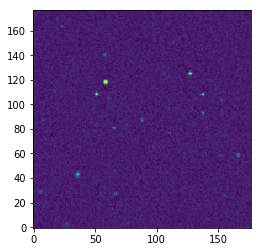

In [10]:
from astropy.io import fits
import matplotlib.pyplot as plt
moment = fits.open(image_list[0])
moment.info()
data = moment[0].data
plt.imshow(data, origin='lower')
# plt.show()